In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"]
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.groupby("Class").size()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

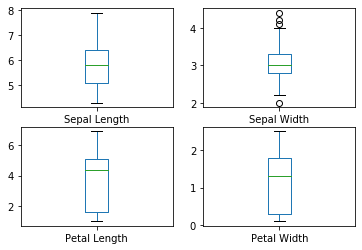

In [4]:
dataset.plot(kind="box", subplots = True, layout=(2,2))
plt.show()

In [5]:
dataset.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


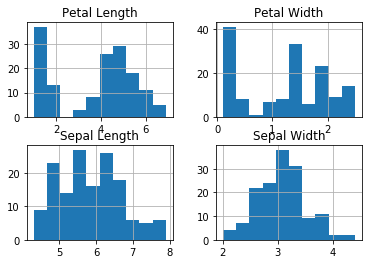

In [6]:
dataset.hist()
plt.show()

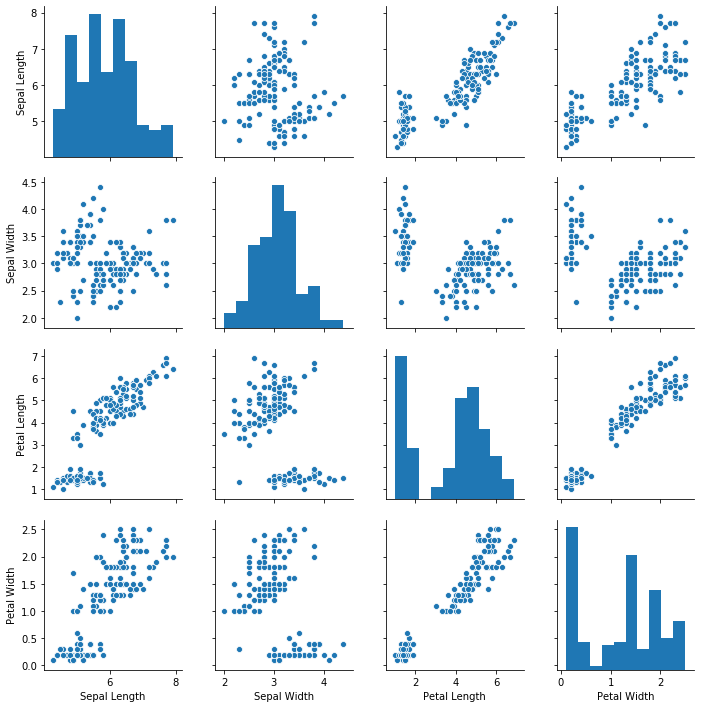

In [7]:
sns.pairplot(dataset)
plt.show()

In [8]:
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]

In [9]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 6, shuffle = True)

In [16]:
list = []
list.append(("LR", LogisticRegression(max_iter=1000)))
list.append(("LDA", LinearDiscriminantAnalysis()))
list.append(("KNN",KNeighborsClassifier()))
list.append(("CART",DecisionTreeClassifier()))
list.append(("NB", GaussianNB()))
list.append(("SVM", SVC()))

In [17]:

result = []
names = []
for name, model in list:
    kfold = model_selection.KFold(n_splits=10, random_state=6, shuffle=True)
    cv_result = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy", )
    result.append(cv_result)
    names.append(name)
    msg = "%s= %f (%f)" %(name, cv_result.mean(), cv_result.std())
    print(msg)

LR= 0.958333 (0.041667)
LDA= 0.975000 (0.038188)
KNN= 0.958333 (0.041667)
CART= 0.933333 (0.050000)
NB= 0.966667 (0.040825)
SVM= 0.941667 (0.053359)
